In [23]:
import pandas as pd
from prophet import Prophet
import requests
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('gt_doge_samo_0410-2611')
df

,date,dogecoin,samoyedcoin
0,2021-10-04 18:00:00,51,0
1,2021-10-04 19:00:00,56,0
2,2021-10-04 20:00:00,100,0
3,2021-10-04 21:00:00,80,0
4,2021-10-04 22:00:00,65,0
...,...,...,...
1288,2021-11-26 10:00:00,73,61
1289,2021-11-26 11:00:00,76,29
1290,2021-11-26 12:00:00,78,0
1291,2021-11-26 13:00:00,78,35


In [3]:
url = 'https://cryptov1-x3jub72uhq-ew.a.run.app/get/coin_history?tickerlist=doge,samo&hoursback=1336'
response = requests.get(url).json()
response['doge']['price']

{'2021-10-04T21:00:00': 0.20764749964468565,
 '2021-10-04T22:00:00': 0.20565787111679718,
 '2021-10-04T23:00:00': 0.20724714950357737,
 '2021-10-05T00:00:00': 0.2083381092622208,
 '2021-10-05T01:00:00': 0.21176108156818257,
 '2021-10-05T02:00:00': 0.2065264074258489,
 '2021-10-05T03:00:00': 0.20810236365216797,
 '2021-10-05T04:00:00': 0.2084337152639599,
 '2021-10-05T05:00:00': 0.20627277647884334,
 '2021-10-05T06:00:00': 0.2059557918894653,
 '2021-10-05T07:00:00': 0.20358732929433038,
 '2021-10-05T08:00:00': 0.20414855954208236,
 '2021-10-05T09:00:00': 0.2054756157283019,
 '2021-10-05T10:00:00': 0.20648415010782747,
 '2021-10-05T11:00:00': 0.2045422989177632,
 '2021-10-05T12:00:00': 0.20681868241362716,
 '2021-10-05T13:00:00': 0.21050382160753675,
 '2021-10-05T14:00:00': 0.20904509500276708,
 '2021-10-05T15:00:00': 0.21355765292046253,
 '2021-10-05T16:00:00': 0.2247527226285325,
 '2021-10-05T17:00:00': 0.22066164418349712,
 '2021-10-05T18:00:00': 0.2220917421631591,
 '2021-10-05T19:00

In [4]:
prices = (response['doge']['price'])
#prices.reset_index(inplace=True)
prices

{'2021-10-04T21:00:00': 0.20764749964468565,
 '2021-10-04T22:00:00': 0.20565787111679718,
 '2021-10-04T23:00:00': 0.20724714950357737,
 '2021-10-05T00:00:00': 0.2083381092622208,
 '2021-10-05T01:00:00': 0.21176108156818257,
 '2021-10-05T02:00:00': 0.2065264074258489,
 '2021-10-05T03:00:00': 0.20810236365216797,
 '2021-10-05T04:00:00': 0.2084337152639599,
 '2021-10-05T05:00:00': 0.20627277647884334,
 '2021-10-05T06:00:00': 0.2059557918894653,
 '2021-10-05T07:00:00': 0.20358732929433038,
 '2021-10-05T08:00:00': 0.20414855954208236,
 '2021-10-05T09:00:00': 0.2054756157283019,
 '2021-10-05T10:00:00': 0.20648415010782747,
 '2021-10-05T11:00:00': 0.2045422989177632,
 '2021-10-05T12:00:00': 0.20681868241362716,
 '2021-10-05T13:00:00': 0.21050382160753675,
 '2021-10-05T14:00:00': 0.20904509500276708,
 '2021-10-05T15:00:00': 0.21355765292046253,
 '2021-10-05T16:00:00': 0.2247527226285325,
 '2021-10-05T17:00:00': 0.22066164418349712,
 '2021-10-05T18:00:00': 0.2220917421631591,
 '2021-10-05T19:00

In [5]:
prices_df = pd.DataFrame(prices, index=['price'])
prices_df = pd.DataFrame.transpose(prices_df)
prices_df

,price
2021-10-04T21:00:00,0.207647
2021-10-04T22:00:00,0.205658
2021-10-04T23:00:00,0.207247
2021-10-05T00:00:00,0.208338
2021-10-05T01:00:00,0.211761
...,...
2021-11-29T08:00:00,0.183851
2021-11-29T09:00:00,0.182785
2021-11-29T10:00:00,0.180022
2021-11-29T11:00:00,0.181940


In [6]:
def replace_T(x):
    x = x.replace(x[10], " ")
    return x

In [7]:
prices_df['date'] = prices_df.index.map(replace_T)
prices_df

,price,date
2021-10-04T21:00:00,0.207647,2021-10-04 21:00:00
2021-10-04T22:00:00,0.205658,2021-10-04 22:00:00
2021-10-04T23:00:00,0.207247,2021-10-04 23:00:00
2021-10-05T00:00:00,0.208338,2021-10-05 00:00:00
2021-10-05T01:00:00,0.211761,2021-10-05 01:00:00
...,...,...
2021-11-29T08:00:00,0.183851,2021-11-29 08:00:00
2021-11-29T09:00:00,0.182785,2021-11-29 09:00:00
2021-11-29T10:00:00,0.180022,2021-11-29 10:00:00
2021-11-29T11:00:00,0.181940,2021-11-29 11:00:00


In [31]:
df = df.merge(prices_df,how='inner', on='date')
df

,date,dogecoin,samoyedcoin,price
0,2021-10-04 21:00:00,80,0,0.207647
1,2021-10-04 22:00:00,65,0,0.205658
2,2021-10-04 23:00:00,75,99,0.207247
3,2021-10-05 00:00:00,67,31,0.208338
4,2021-10-05 01:00:00,58,0,0.211761
...,...,...,...,...
1285,2021-11-26 10:00:00,73,61,0.178485
1286,2021-11-26 11:00:00,76,29,0.177660
1287,2021-11-26 12:00:00,78,0,0.175181
1288,2021-11-26 13:00:00,78,35,0.179486


In [32]:
df = df.drop(columns='samoyedcoin')
df

,date,dogecoin,price
0,2021-10-04 21:00:00,80,0.207647
1,2021-10-04 22:00:00,65,0.205658
2,2021-10-04 23:00:00,75,0.207247
3,2021-10-05 00:00:00,67,0.208338
4,2021-10-05 01:00:00,58,0.211761
...,...,...,...
1285,2021-11-26 10:00:00,73,0.178485
1286,2021-11-26 11:00:00,76,0.177660
1287,2021-11-26 12:00:00,78,0.175181
1288,2021-11-26 13:00:00,78,0.179486


In [33]:
df = df.drop(df.index[-1])
df

,date,dogecoin,price
0,2021-10-04 21:00:00,80,0.207647
1,2021-10-04 22:00:00,65,0.205658
2,2021-10-04 23:00:00,75,0.207247
3,2021-10-05 00:00:00,67,0.208338
4,2021-10-05 01:00:00,58,0.211761
...,...,...,...
1284,2021-11-26 09:00:00,85,0.172399
1285,2021-11-26 10:00:00,73,0.178485
1286,2021-11-26 11:00:00,76,0.177660
1287,2021-11-26 12:00:00,78,0.175181


In [34]:
df = df.rename(columns={'date': 'ds', 'dogecoin': 'searches', 'price': 'y'})
df

,ds,searches,y
0,2021-10-04 21:00:00,80,0.207647
1,2021-10-04 22:00:00,65,0.205658
2,2021-10-04 23:00:00,75,0.207247
3,2021-10-05 00:00:00,67,0.208338
4,2021-10-05 01:00:00,58,0.211761
...,...,...,...
1284,2021-11-26 09:00:00,85,0.172399
1285,2021-11-26 10:00:00,73,0.178485
1286,2021-11-26 11:00:00,76,0.177660
1287,2021-11-26 12:00:00,78,0.175181


In [35]:
df['24h_searches'] = df['searches'].rolling(window=24).mean()
df = df.dropna()
df

,ds,searches,y,24h_searches
23,2021-10-05 20:00:00,78,0.222582,61.708333
24,2021-10-05 21:00:00,72,0.217378,61.375000
25,2021-10-05 22:00:00,68,0.218097,61.500000
26,2021-10-05 23:00:00,66,0.217583,61.125000
27,2021-10-06 00:00:00,68,0.217061,61.166667
...,...,...,...,...
1284,2021-11-26 09:00:00,85,0.172399,84.541667
1285,2021-11-26 10:00:00,73,0.178485,84.875000
1286,2021-11-26 11:00:00,76,0.177660,85.166667
1287,2021-11-26 12:00:00,78,0.175181,85.416667


In [36]:
df_train = df.loc[df.index<round(df.index[-1]*0.7)]
df_test  = df.loc[df.index>=round(df.index[-1]*0.7)]

In [37]:
m = Prophet()
m.add_regressor('searches')
m.add_regressor('24h_searches')
m.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -3.30995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2675.37    0.00841495       874.721           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2690.08      0.020438       427.666           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2699.54   4.48761e-05       219.963       0.358       0.358      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2703.98    0.00159732       203.349      0.6323      0.6323      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     473       2706.89    0.00012559       244.774   3.195e-07       0.001      591  LS failed, Hessian reset 
     499       2707.77    0.00311025    

19   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       2709.62   0.000349916       118.074      0.2559           1      728   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     660       2710.06   0.000185507       238.369   1.338e-06       0.001      842  LS failed, Hessian reset 
     699        2710.2   1.41151e-05       64.6423      0.4987      0.4987      889   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     749       2710.76   0.000112717       179.078   9.901e-07       0.001      986  LS failed, Hessian reset 
     799       2711.07   6.87733e-05       53.1557      0.1477           1     1051   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       2712.43    0.00760636       425.784           1           1     1169   
    Iter      log prob        ||dx||      ||grad||      

In [38]:
forecast = m.predict(df_test.drop(columns="y"))

In [39]:
forecast['y_true'] = df_train['y']
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,24h_searches,24h_searches_lower,24h_searches_upper,additive_terms,...,searches_lower,searches_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y_true
0,2021-11-10 20:00:00,0.235094,0.225017,0.242906,0.235094,0.235094,0.000204,0.000204,0.000204,-0.000793,...,0.001255,0.001255,-0.001883,-0.001883,-0.001883,0.0,0.0,0.0,0.234301,NaN
1,2021-11-10 21:00:00,0.235122,0.225594,0.243814,0.235122,0.235122,0.000207,0.000207,0.000207,-0.000463,...,0.001834,0.001834,-0.001716,-0.001716,-0.001716,0.0,0.0,0.0,0.234660,NaN
2,2021-11-10 22:00:00,0.235151,0.224367,0.243646,0.235151,0.235151,0.000207,0.000207,0.000207,-0.001168,...,0.001255,0.001255,-0.001538,-0.001538,-0.001538,0.0,0.0,0.0,0.233983,NaN
3,2021-11-10 23:00:00,0.235179,0.225642,0.242379,0.235179,0.235179,0.000205,0.000205,0.000205,-0.001444,...,0.000840,0.000840,-0.001350,-0.001350,-0.001350,0.0,0.0,0.0,0.233735,NaN
4,2021-11-11 00:00:00,0.235207,0.224094,0.242387,0.235207,0.235207,0.000202,0.000202,0.000202,-0.001458,...,0.000509,0.000509,-0.001155,-0.001155,-0.001155,0.0,0.0,0.0,0.233749,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2021-11-26 09:00:00,0.245656,0.165175,0.328542,0.161545,0.323639,0.000867,0.000867,0.000867,0.005796,...,0.002746,0.002746,0.000392,0.000392,0.000392,0.0,0.0,0.0,0.251452,0.211580
383,2021-11-26 10:00:00,0.245684,0.165223,0.326981,0.161135,0.323858,0.000875,0.000875,0.000875,0.004261,...,0.001752,0.001752,0.000249,0.000249,0.000249,0.0,0.0,0.0,0.249945,0.215887
384,2021-11-26 11:00:00,0.245712,0.164708,0.329540,0.160725,0.324078,0.000883,0.000883,0.000883,0.003924,...,0.002000,0.002000,0.000104,0.000104,0.000104,0.0,0.0,0.0,0.249636,0.218018
385,2021-11-26 12:00:00,0.245741,0.162596,0.327900,0.160315,0.324297,0.000890,0.000890,0.000890,0.003633,...,0.002166,0.002166,-0.000041,-0.000041,-0.000041,0.0,0.0,0.0,0.249373,0.218467


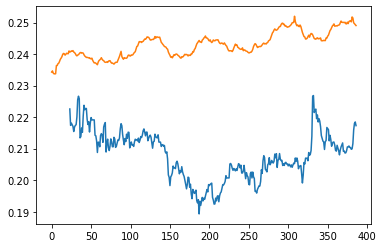

In [40]:
plt.plot(forecast['y_true'])
plt.plot(forecast['yhat'])